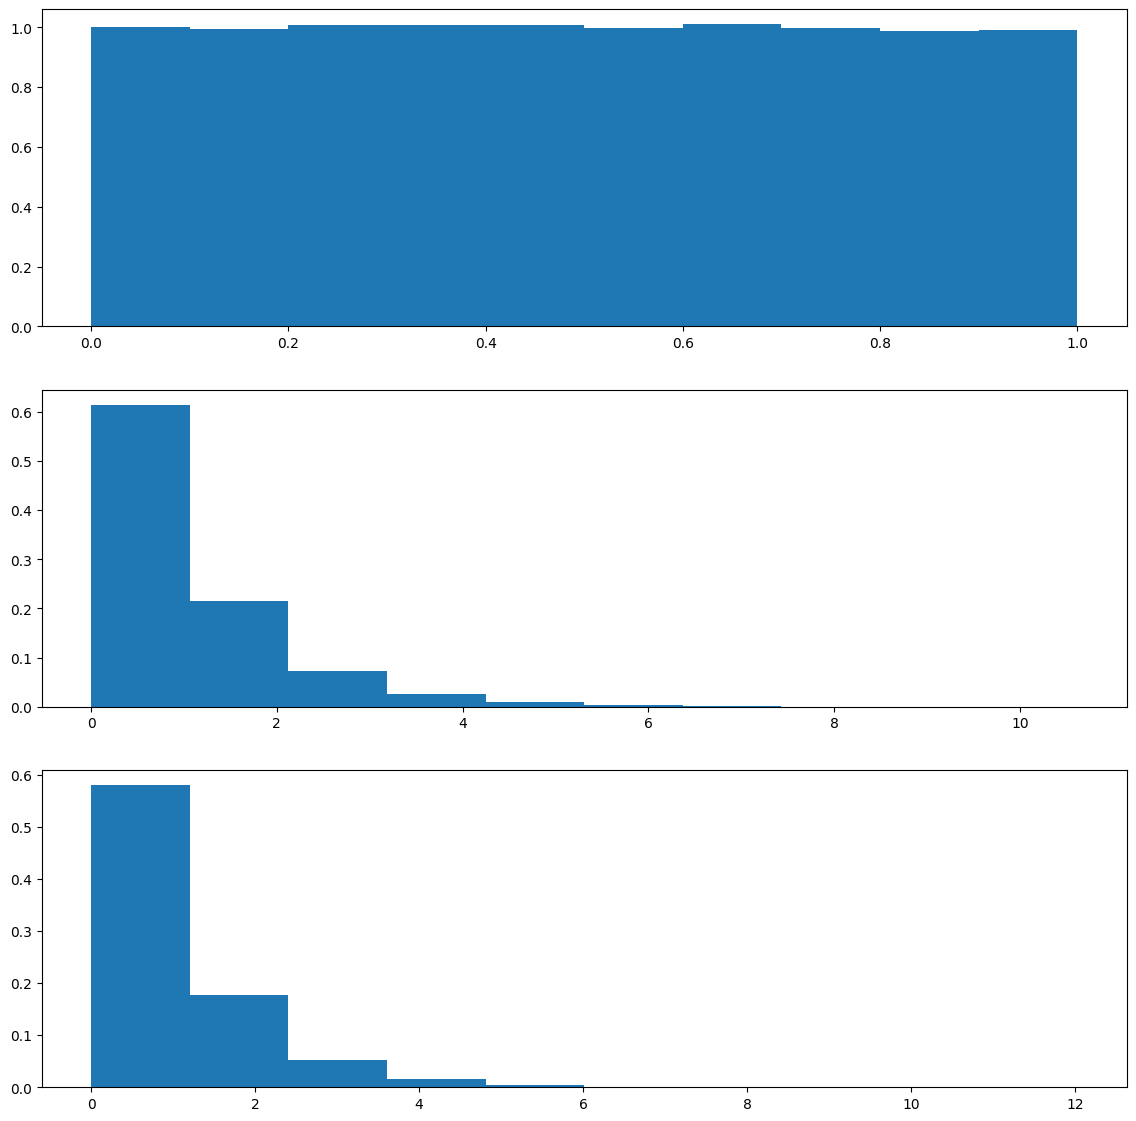

In [1]:
import numpy as np
import matplotlib.pyplot as plt
n = 100000
x = np.random.uniform(0,1,n)
y = -np.log(x)
z = np.random.exponential(1,n)
fig, axs = plt.subplots(3,1,figsize=(14,14))
axs[0].hist(x,density=True)
axs[1].hist(y,density=True)
axs[2].hist(z,density=True)
plt.show()

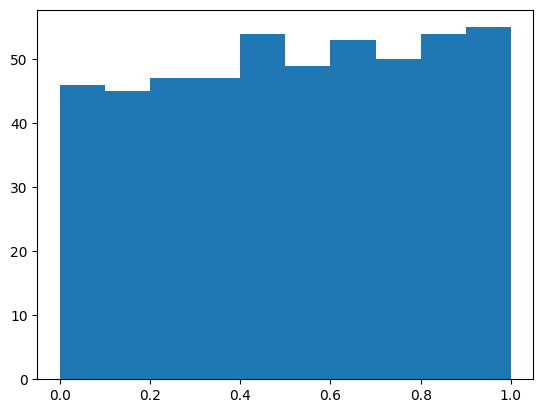

In [2]:
X = np.random.binomial(1,0.5,size=(10000,500))
Y = []
for i in range(500):
    y = 0
    for j in range(10000):
       
        y += (X[j,i]*0.5**(j+1))

    Y.append(y)

plt.hist(Y)
plt.show()


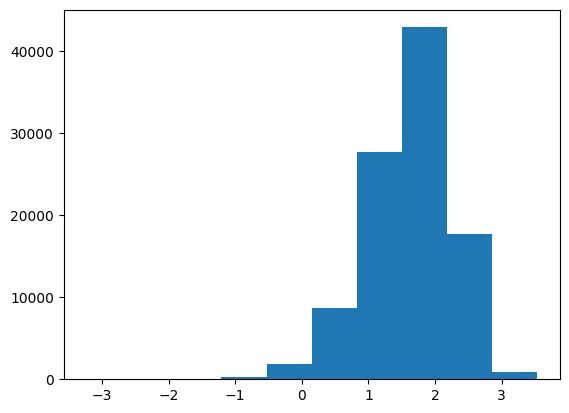

In [3]:
U = np.random.chisquare(6,n)
plt.hist(np.log(U))
plt.show()

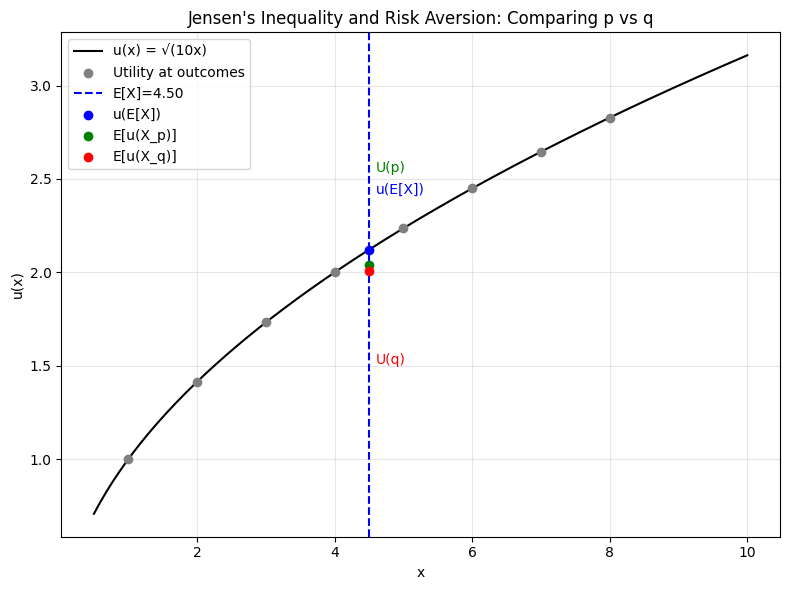

U_q = 2.0093
U_p = 2.0383


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the lotteries
z = [1,2,3,4,5,6,7,8]
p = [1/8,1/8,1/8,1/8,1/8,1/8,1/8,1/8]
q = [2/8,0/8,1/8,1/8,1/8,1/8,0/8,2/8]

# Convert to numpy arrays
x_values = np.array(z)
p = np.array(p)
q = np.array(q)

# Define the concave utility function
u = lambda x: np.sqrt(  x)

# Expected value of X (same for p and q here, but you can adjust)
mu = np.sum(x_values * p)

# Expected utilities
U_p = np.sum(p * u(x_values))
U_q = np.sum(q * u(x_values))

# Plot utility function
x = np.linspace(0.5, 10, 200)
plt.figure(figsize=(8,6))
plt.plot(x, u(x), label='u(x) = √(10x)', color='black')
plt.scatter(x_values, u(x_values), color='gray', zorder=3, label='Utility at outcomes')

# Mark expected values and utilities
plt.axvline(mu, color='blue', linestyle='--', label=f'E[X]={mu:.2f}')
plt.scatter([mu], [u(mu)], color='blue', zorder=5, label='u(E[X])')
plt.scatter([mu], [U_p], color='green', zorder=5, label='E[u(X_p)]')
plt.scatter([mu], [U_q], color='red', zorder=5, label='E[u(X_q)]')

# Annotate differences
plt.text(mu+0.1, U_p+0.5, 'U(p)', color='green')
plt.text(mu+0.1, U_q-0.5, 'U(q)', color='red')
plt.text(mu+0.1, u(mu)+0.3, 'u(E[X])', color='blue')

# Labels and title
plt.title("Jensen's Inequality and Risk Aversion: Comparing p vs q")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"U_q = {U_q:.4f}")
print(f"U_p = {U_p:.4f}")


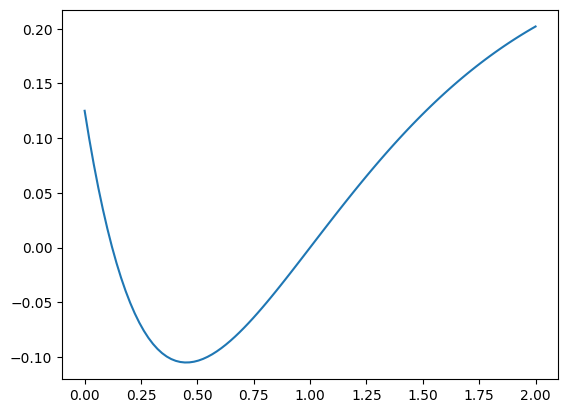

0.1220354558835823


In [46]:
def u(x,rho):
    return x**(1-rho)

def u_der(x,rho):
    return -np.log(x)*x**(1-rho)

def g(rho):
    return 1/4 * u(1,rho) + 1/4 * u(2,rho) + 1/8 * u(5,rho) + 1/8 * u(6,rho) + 1/4 *u(8,rho) - u(4,rho)

def g_der(rho):
        return  (1/4 * u_der(1,rho) + 1/4 * u_der(2,rho) + 1/8 * u_der(5,rho) + 1/8 * u_der(6,rho) + 1/4 * u_der(8,rho) - u_der(4,rho))

def rho_n(i):
    if i == 1:
        return 1/2
    else:
        rho_np = rho_n(i-1)-g(rho_n(i-1))/g_der(rho_n(i-1))
        # print(g(rho_np))
        i+=1
        return rho_np
    
rho = np.linspace(0,2,100)
plt.plot(rho,g(rho))
plt.show()
print(rho_n(12))
